# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  
    
> 다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
> - API는 통신을 위해 정형화 된 데이터 형태의 text  
> - 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

In [47]:
# 필요패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

#### 네이버 메인페이지 크롤링

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode_v11@2x.png" style="padding-left: 70px" width="280"/>,
 <img alt="SBS" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/055.png"/>,
 <img alt="동아일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/020.png"/>,
 <img alt="시사인" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/308.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2022/0208/nsd16121208.png"/>,
 <img alt="YTN" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/052.png"/>,
 <img alt="이데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/018.png"/>,
 <img alt="MBC" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/214.png"/>,
 
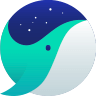
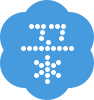

In [5]:
# 네이버 메인페이지
# url정의
url = "https://www.naver.com"


# requsts로 url에 정보요청
# requests -> 파이썬이 컴퓨터 간 통신체계에 해당하는 명령어들을 사용하도록 만든 패키지
# 해당코드를 실행시키는 순간 
resp = requests.get(url)


# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text,"html.parser")

# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

#### 다음 뉴스페이지 크롤링

In [ ]:
# 다음 뉴스 페이지 크롤링
# url정의
url= "https://news.daum.net/"
# requsts로 url에 정보요청
resp = requests.get(url)
# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text,"html.parser")
# html 내에서 뉴스헤더 선별
html

In [12]:
# list 형식으로 불러온다
for news in html.select("a.link_txt")[:13]:
    print(news.text.strip())

국민의당 의총서 권은희 제명안 부결..국민의힘 이름 달고 '검수완박' 찬성하나
인수위 "코로나 감염병 등급 재상향 검토 안해..27일 새정부 방역대책 발표"
우크라 침공 60일..러, 마리우폴·동부 공세에 민간인 피해
700억원 낸 우주정거장 체류 민간인 닷새 '덤' 끝내고 귀환 중
니카라과, OAS 사무소 폐쇄..직원들 추방
김오수 "검찰, 중재안 동의할 수 없다"..'수사권 박탈 동조' 의혹 부인
최교진 세종시교육감 3선 도전 선언 "교육수도 완성"
지금 우크라와 겹치는 120년 전 러시아 고전 뮤지컬
상상 그 이상의 '도발'.. 韓 여성작가 이미래의 '미래'에 기대감
인수위, 코로나 피해 손실보상안 이번 주 발표
인수위 막바지..이번주 국정과제 확정·대통령실 인선 마무리
전국 버스 2만대 멈춰서나..9개 지역 노조 오늘 막판 협상
코로나19 유행 감소세지만 고령층 확진 비중↑..'안심은 금물'


In [41]:
url="https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8"

resp= requests.get(url)
html = BeautifulSoup(resp.text,"html.parser")

html.select('span.ball')

[<span class="ball bg_ball1">5</span>,
 <span class="ball bg_ball2">11</span>,
 <span class="ball bg_ball2">18</span>,
 <span class="ball bg_ball2">20</span>,
 <span class="ball bg_ball4">35</span>,
 <span class="ball bg_ball5">45</span>,
 <span class="ball txt_bonus"><span class="screen_out">보너스</span></span>,
 <span class="ball bg_ball1">3</span>]

In [42]:
for num in html.select("span.ball"):
    print(num.text)

5
11
18
20
35
45
보너스
3


### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">비비고 왕교자</span>

>> 단일 셀렉터  
html.select('span')  # 태그 이름이 span인 친구들을 다 들고옴  
tag : span  
class(별명, 그룹명) : .news

>> 클래스 포함 셀렉터
html.select('span.news')

>> id 포함 셀렉터
id(고유값) : #1234
html.select('span#1234')

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [27]:
import time

In [39]:
# 슬의생, 스물다섯 스물하나, 드라마소개 크롤링
drama=['슬의생','스물다섯 스물하나','나의 아저씨']
url="https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q="

for name in drama:
    time.sleep(2)
    resp=requests.get(url+name)
    html = BeautifulSoup(resp.text,"html.parser")
    print(f"{name}: {html.select('dd.cont')[0].text}")



슬의생: 누군가는 태어나고 누군가는 삶을 끝내는, 인생의 축소판이라 불리는 병원에서 평범한 듯 특별한 하루하루를 살아가는 사람들과 눈빛만 봐도 알 수 있는 20년지기 친구들의 케미스토리를 담은 드라마
스물다섯 스물하나: 1998년을 배경으로 사회의 혼란 속에서 만난 두 남녀의 사랑과 청춘 이야기를 그린 드라마
나의 아저씨: 삶의 무게를 버티며 살아가는 아저씨 삼 형제와 거칠게 살아온 한 여성이 서로를 통해 삶을 치유하게 되는 이야기를 그린 드라마


In [ ]:
# 해당 드라마 뉴스 제목 크롤링


## 다음에서 로또번호 가져오기

In [ ]:
# url 설정

# requests로 데이터 요청하기

# html로 변환

# 데이터 선별


## 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다

In [52]:
# 로또 1회차부터 30회차까지
url = "https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q="
result=[]
for i in range(1,30):
  
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    resp= requests.get(url+str(i)+"회차 로또")
    html = BeautifulSoup(resp.text,"html.parser")

    for num in html.select("span.ball"):
        element = num.text
        if element =="보너스":
            pass
        else:
            result.append(int(element))
    print(f"{i}회차 크롤링")

1회차 크롤링
2회차 크롤링
3회차 크롤링
4회차 크롤링
5회차 크롤링
6회차 크롤링
7회차 크롤링
8회차 크롤링
9회차 크롤링
10회차 크롤링
11회차 크롤링
12회차 크롤링
13회차 크롤링
14회차 크롤링
15회차 크롤링
16회차 크롤링
17회차 크롤링
18회차 크롤링
19회차 크롤링
20회차 크롤링
21회차 크롤링
22회차 크롤링
23회차 크롤링
24회차 크롤링
25회차 크롤링
26회차 크롤링
27회차 크롤링
28회차 크롤링
29회차 크롤링


In [54]:
lotto= np.array(result).reshape(-1,7)


In [59]:
index1=[]
for i in range(1,30):
    index1.append(f"{i}회차")
index1

['1회차',
 '2회차',
 '3회차',
 '4회차',
 '5회차',
 '6회차',
 '7회차',
 '8회차',
 '9회차',
 '10회차',
 '11회차',
 '12회차',
 '13회차',
 '14회차',
 '15회차',
 '16회차',
 '17회차',
 '18회차',
 '19회차',
 '20회차',
 '21회차',
 '22회차',
 '23회차',
 '24회차',
 '25회차',
 '26회차',
 '27회차',
 '28회차',
 '29회차']

In [60]:
df_lotto = pd.DataFrame(data=lotto,index=index1)

df_lotto

,0,1,2,3,4,5,6
1회차,10,23,29,33,37,40,16
2회차,9,13,21,25,32,42,2
3회차,11,16,19,21,27,31,30
4회차,14,27,30,31,40,42,2
5회차,16,24,29,40,41,42,3
6회차,14,15,26,27,40,42,34
7회차,2,9,16,25,26,40,42
8회차,8,19,25,34,37,39,9
9회차,2,4,16,17,36,39,14
10회차,9,25,30,33,41,44,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


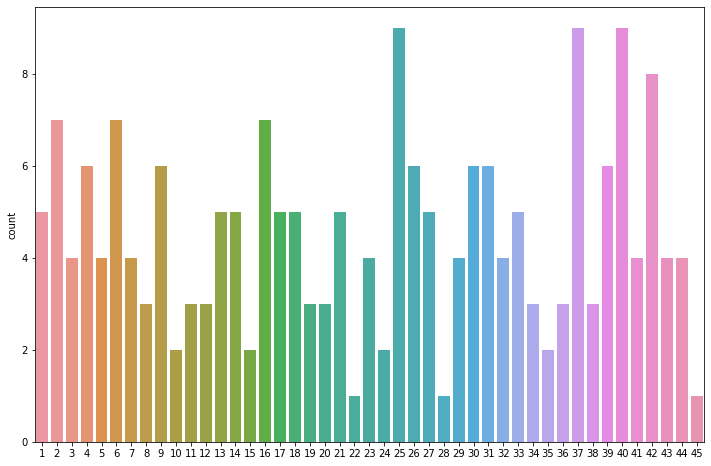

In [65]:
# 데이터 시각화까지
plt.figure(figsize=(12,8))

sns.countplot(result)
plt.show()

In [ ]:
# 로또데이터 저장


In [ ]:
requests.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

200

In [ ]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

## **네이버 키워드로 검색한 결과를 크롤링(속성 접근)**

In [83]:
key=input("키워드를 입력하세요: ")
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=" + key
resp= requests.get(url)

html = BeautifulSoup(resp.text,"html.parser")
html.select("a.api_txt_lines.total_tit._cross_trigger")



for post in html.select("a.api_txt_lines.total_tit._cross_trigger"):
    print(post.text,post.attrs["href"])



키워드를 입력하세요: 이어드림 스쿨
스타트업 AI기술인력 양성(이어드림 스쿨) 교육운영사 모집 공고_중소벤처기업부 https://blog.naver.com/ash1106/222630166306
이어드림스쿨 면접 후기 https://blog.naver.com/lrickyl/222676324522
중진공, 이어드림 스쿨(Year Dream School)을 소개합니다! https://blog.naver.com/sbcblog/222596245344
스타트업의 인공지능 기술인력을 양성하는 <스타트업-청년인재 이어드림 스쿨>을 개소하였습니다. https://blog.naver.com/psspsshi/222500226004
2022년 스타트업 AI기술인력 양성(이어드림 스쿨) 2기 교육생 모집 https://blog.naver.com/neetpeace12/222654614810
오랜만에 근황 토크~ : 코딩 교육 시작 - 이어드림 스쿨 2기 https://blog.naver.com/wjy0t/222692849222
2022년 스타트업 AI기술인력 양성사업(이어드림 스쿨) 청년인재 모집 연장 공고 https://blog.naver.com/sdhys2/222654360952


    가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

#### 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기

In [ ]:
https://finance.naver.com/search/searchList.naver?query=%BC%BF%C6%AE%B8%AE%BF%C2

https://finance.naver.com/item/main.naver?code=068270

In [160]:
#삼성전자
url = "https://finance.naver.com/item/main.naver?code=005930"
resp= requests.get(url)

html = BeautifulSoup(resp.text,"html.parser")

#시총
total=html.select("em#_market_sum")[0].text.strip().replace("\t","").replace("\n","") +"억 원"
index = html.select("div.gray")[0].text.index("%")

foreign = html.select("tr.strong em")[1].text

per = html.select("em#_per")[0].text
pbr = html.select("em#_pbr")[0].text
# 시가총액, 외국인 소진률, PER, PBR
print(f"시총:{total} per: {per} 외국인 소진률: {foreign} pbr: {pbr}")

시총:396조3,936억 원 per: 11.49 외국인 소진률: 51.13% pbr: 1.52


#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [164]:
codes= {"삼성전자": "005930","셀트리온":"068270","SK 하이닉스":'000660'}


for code in codes:
    url = "https://finance.naver.com/item/main.naver?code="+codes[code]
    resp= requests.get(url)

    html = BeautifulSoup(resp.text,"html.parser")

    #시총
    total=html.select("em#_market_sum")[0].text.strip().replace("\t","").replace("\n","") +"억 원"
    index = html.select("div.gray")[0].text.index("%")

    foreign = html.select("tr.strong em")[1].text

    per = html.select("em#_per")[0].text
    pbr = html.select("em#_pbr")[0].text
    # 시가총액, 외국인 소진률, PER, PBR
    print(f"{code}정보: 시총:{total} per: {per} 외국인 소진률: {foreign} pbr: {pbr}")


삼성전자정보: 시총:396조3,936억 원 per: 11.49 외국인 소진률: 51.13% pbr: 1.52
셀트리온정보: 시총:21조9,473억 원 per: 38.13 외국인 소진률: 19.45% pbr: 5.52
SK 하이닉스정보: 시총:78조6,243억 원 per: 8.19 외국인 소진률: 49.87% pbr: 1.19


In [162]:
codes= {"삼성전자": "005930","셀트리온":"068270","SK 하이닉스":'000660'}

for i in codes:
    print(i)

삼성전자
셀트리온
SK 하이닉스


[['462조6,581', '51.98%', '16.32', '1.92'],
 ['5,145', '11.36%', '3.64', '0.67'],
 ['32조2,118', '5.45%', '219.42', '9.55']]

In [ ]:
# 데이터프레임 제작


,시가총액,외국인소진률,PER,PBR
삼성전자,"462조6,581",51.98%,16.32,1.92
코오롱,"5,145",11.36%,3.64,0.67
카카오뱅크,"32조2,118",5.45%,219.42,9.55


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [165]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.
# requests 요청시에 헤더정보 추가

url="https://finance.naver.com/item/sise_day.naver?code=005930&page=2"

info ={ 'referer':'https://finance.naver.com/item/sise_day.naver?code=005930',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0'}

# referer 정보: 이 사용자가 이 페이지에 요청하기 전 어느 페이지에 있었는지 
# 유저에이전트 : 사용자컴퓨터 정보

In [211]:
resp= requests.get(url, headers=info)



html = BeautifulSoup(resp.text,"html.parser")

col_nm= [ col.text for col in html.select("th")[1:]]
print(col_nm)

index= [date.text for date in html.select('span.p10')]
index

price= [price.text.strip() for price in html.select('span.p11')]


['종가', '전일비', '시가', '고가', '저가', '거래량']


In [213]:
price_ = np.array(price).reshape(-1,6)
price_

array([['67,900', '100', '67,800', '68,100', '67,400', '12,263,735'],
       ['67,800', '200', '68,100', '68,300', '67,700', '15,453,191'],
       ['68,000', '500', '68,500', '68,500', '68,000', '20,683,327'],
       ['68,500', '700', '68,600', '68,800', '68,500', '15,517,308'],
       ['69,200', '100', '69,400', '69,600', '69,100', '8,467,248'],
       ['69,300', '200', '68,900', '69,300', '68,600', '11,107,905'],
       ['69,100', '500', '69,500', '69,500', '69,000', '15,916,846'],
       ['69,600', '300', '69,900', '70,200', '69,600', '12,510,366'],
       ['69,900', '300', '70,300', '70,500', '69,800', '12,670,187'],
       ['70,200', '500', '70,000', '70,300', '69,800', '13,686,208']],
      dtype='<U10')

In [214]:
df =pd.DataFrame(price_, columns=col_nm,index=index)
df

,종가,전일비,시가,고가,저가,거래량
2022.04.11,"67,900",100,"67,800","68,100","67,400","12,263,735"
2022.04.08,"67,800",200,"68,100","68,300","67,700","15,453,191"
2022.04.07,"68,000",500,"68,500","68,500","68,000","20,683,327"
2022.04.06,"68,500",700,"68,600","68,800","68,500","15,517,308"
2022.04.05,"69,200",100,"69,400","69,600","69,100","8,467,248"
2022.04.04,"69,300",200,"68,900","69,300","68,600","11,107,905"
2022.04.01,"69,100",500,"69,500","69,500","69,000","15,916,846"
2022.03.31,"69,600",300,"69,900","70,200","69,600","12,510,366"
2022.03.30,"69,900",300,"70,300","70,500","69,800","12,670,187"
2022.03.29,"70,200",500,"70,000","70,300","69,800","13,686,208"


In [ ]:
# 콤마 제거

# 함수 적용

# 타입 변환

# 종가 그래프


### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [ ]:
# 헤더정보 정의
info ={ 'referer':'https://finance.naver.com/item/sise_day.naver?code=005930',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0'}

# 인덱스 정의


# 전체 가격 데이터

# requests 요청시에 헤더정보 추가

# html 변환

# 날짜 인덱스 살려서 활용하기

# 가격정보 추출

# 데이터프레임 제작


1페이지 크롤링 중
2페이지 크롤링 중
3페이지 크롤링 중
4페이지 크롤링 중
5페이지 크롤링 중
6페이지 크롤링 중
7페이지 크롤링 중
8페이지 크롤링 중
9페이지 크롤링 중
10페이지 크롤링 중
11페이지 크롤링 중
12페이지 크롤링 중
13페이지 크롤링 중
14페이지 크롤링 중
15페이지 크롤링 중
16페이지 크롤링 중
17페이지 크롤링 중
18페이지 크롤링 중
19페이지 크롤링 중
20페이지 크롤링 중


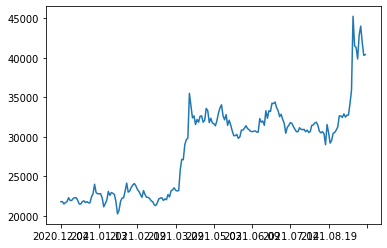

### 종목도 여러개 순환시키고 각 개별종목 데이터 csv 저장하는 연습

### 네이버 데이터랩 인기검색어 크롤링

In [223]:
url="https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000000"
info ={ 'referer':'https://datalab.naver.com/',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0'}
resp= requests.get(url, headers=info)



[{"message":null,"statusCode":200,"returnCode":0,"date":"2022/04/13","datetime":"2022.04.13.(수)","range":"","ranks":[{"rank":1,"keyword":"원피스","linkId":"원피스"},{"rank":2,"keyword":"반팔티","linkId":"반팔티"},{"rank":3,"keyword":"바람막이","linkId":"바람막이"},{"rank":4,"keyword":"나이키바람막이","linkId":"나이키바람막이"},{"rank":5,"keyword":"블라우스","linkId":"블라우스"},{"rank":6,"keyword":"반바지","linkId":"반바지"},{"rank":7,"keyword":"셔츠","linkId":"셔츠"},{"rank":8,"keyword":"롱원피스","linkId":"롱원피스"},{"rank":9,"keyword":"하객원피스","linkId":"하객원피스"},{"rank":10,"keyword":"써스데이아일랜드원피스","linkId":"써스데이아일랜드원피스"}]},{"message":null,"statusCode":200,"returnCode":0,"date":"2022/04/14","datetime":"2022.04.14.(목)","range":"","ranks":[{"rank":1,"keyword":"원피스","linkId":"원피스"},{"rank":2,"keyword":"반팔티","linkId":"반팔티"},{"rank":3,"keyword":"반티","linkId":"반티"},{"rank":4,"keyword":"바람막이","linkId":"바람막이"},{"rank":5,"keyword":"나이키바람막이","linkId":"나이키바람막이"},{"rank":6,"keyword":"반바지","linkId":"반바지"},{"rank":7,"keyword":"셔츠","linkId":"셔츠"},{"rank":8,"k

In [224]:
# json 데이터 파싱
import json

In [226]:
data = json.loads(resp.text)


{'date': '2022/04/13',
 'datetime': '2022.04.13.(수)',
 'message': None,
 'range': '',
 'ranks': [{'keyword': '원피스', 'linkId': '원피스', 'rank': 1},
  {'keyword': '반팔티', 'linkId': '반팔티', 'rank': 2},
  {'keyword': '바람막이', 'linkId': '바람막이', 'rank': 3},
  {'keyword': '나이키바람막이', 'linkId': '나이키바람막이', 'rank': 4},
  {'keyword': '블라우스', 'linkId': '블라우스', 'rank': 5},
  {'keyword': '반바지', 'linkId': '반바지', 'rank': 6},
  {'keyword': '셔츠', 'linkId': '셔츠', 'rank': 7},
  {'keyword': '롱원피스', 'linkId': '롱원피스', 'rank': 8},
  {'keyword': '하객원피스', 'linkId': '하객원피스', 'rank': 9},
  {'keyword': '써스데이아일랜드원피스', 'linkId': '써스데이아일랜드원피스', 'rank': 10}],
 'returnCode': 0,
 'statusCode': 200}

In [229]:
for item in data:
    print(item['datetime'],item['ranks'][1]['keyword'])

2022.04.13.(수) 반팔티
2022.04.14.(목) 반팔티
2022.04.15.(금) 반팔티
2022.04.16.(토) 반팔티
2022.04.17.(일) 반팔티
2022.04.18.(월) 반티
2022.04.19.(화) 반티
2022.04.20.(수) 반티
2022.04.21.(목) 반티
2022.04.22.(금) 반티
2022.04.23.(토) 반팔티
2022.04.24.(일) 반팔티


### 다음 주식 일자별 주가 데이터 크롤링 연습

In [232]:
#json -> dataframe

url="https://api.finance.naver.com/service/itemSummary.naver?itemcode=005930&_callback=window.__jindo2_callback._50"
info ={ 'referer':'https://finance.naver.com/item/sise.naver?code=005930',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0'}
resp= requests.get(url, headers=info)

resp.text

'window.__jindo2_callback._50({"marketSum":395796583,"per":11.48,"eps":5777.0,"pbr":1.52,"now":66300,"diff":-700,"rate":-1.04,"quant":10804542,"amount":717601,"high":66700,"low":66300,"risefall":5})'

## 파파고 API

In [ ]:
papago()

번역이 필요한 한국어를 입력하세요 : 강의시작하겠습니다 카메라를 켜주시고 참석바랍니다.
Let's begin the lecture. Please turn on the camera and attend.


## 공공데이터 API

In [241]:
key ="bWA63G4Wab6usVvkj6TlONzsVBwiBXJYQEM6qvOvNHC+b9RgYN+vKu/1kG0N6rlZhuFyfOy3zttjBjwSEaxQeA=="

url ="http://apis.data.go.kr/1790387/covid19CurrentStatusHospitalizations/covid19CurrentStatusHospitalizationsJson?serviceKey=" + key

In [242]:
resp = requests.get(url)

In [243]:
resp.text

'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>30</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'

서울특별시 중구 퇴계로36길 10(필동2가 80-2)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 소월로 91(남대문로5가 471)
서울특별시 중구 장충동2가 산14-21
서울특별시 중구 남산공원길 125-72(예장동 산5-6)
서울특별시 중구 예장동 8-1
서울특별시 중구 예장동 8-1
서울특별시 중구 필동로1길 30(장충동2가 192-5)
서울특별시 중구 장충단로 72(장충동2가 201-6)
